In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file
df = pd.read_csv('./bestsellers_with_categories.csv')

In [4]:
# Output the first five rows
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
# Output dataset sizes
df.shape

(550, 7)

In [6]:
# How many books does the dataset store?
num_unique_books = df['Name'].nunique()
print(f"Answer: The dataset stores data about {num_unique_books} books.")

Answer: The dataset stores data about 351 books.


In [7]:
# Change column names
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [8]:
# Are there gaps in any variables? (Yes / No)
missing_data = df.isna().sum()
print(f"Answer: {'Yes' if missing_data.any() else 'No'}")

Answer: No


In [9]:
# What are the unique genres?
unique_genres = df['genre'].unique()
print(f"Answer: {' and '.join(unique_genres)} are unique genres.")

Answer: Non Fiction and Fiction are unique genres.


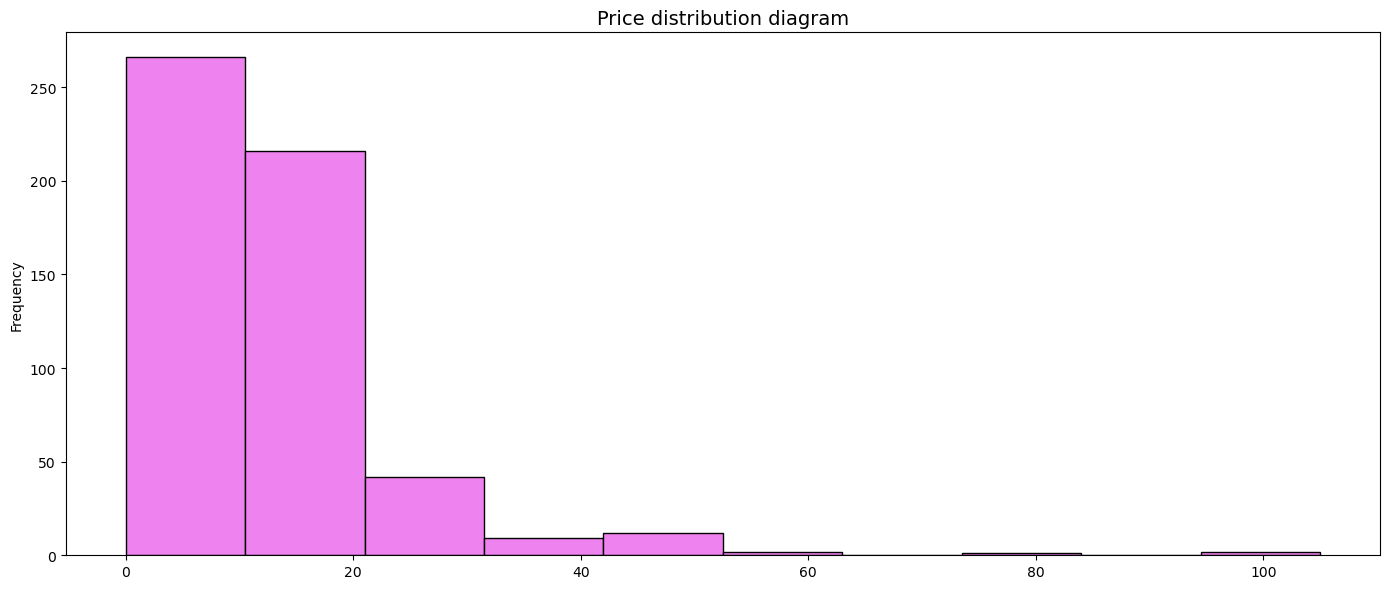

In [10]:
# Price distribution diagram
plt.figure(figsize=(14, 6))
df['price'].plot(kind='hist', color='violet', edgecolor='black')
plt.title('Price distribution diagram', fontsize=14)
plt.tight_layout()
plt.show()

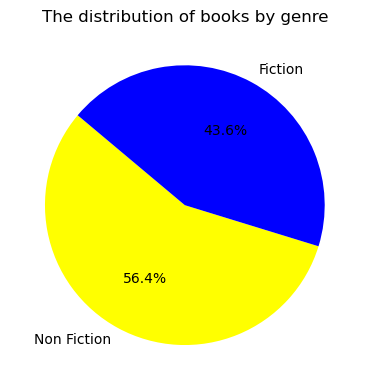

In [11]:
# A pie chart of the distribution of books by genre
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(4, 4))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['yellow', 'blue'])
plt.title('The distribution of books by genre')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [12]:
# Determine what our maximum, minimum, average, median prices are
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Answer: Maximum price — ${max_price:.2f}")
print(f"Answer: Minimum price — ${min_price:.2f}")
print(f"Answer: Average price — ${mean_price:.2f}")
print(f"Answer: Median price — ${median_price:.2f}")

Answer: Maximum price — $105.00
Answer: Minimum price — $0.00
Answer: Average price — $13.10
Answer: Median price — $11.00


In [13]:
# What is the highest rating in the dataset?
max_rating = df['user_rating'].max()
print(f"Answer: The highest rating in the dataset is {max_rating}.")

Answer: The highest rating in the dataset is 4.9.


In [14]:
# How many books have this rating?
count_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f"Answer: {count_max_rating} books have this rating.")

Answer: 52 books have this rating.


In [15]:
# Which book has the largest number of reviews?
most_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].values[0]
print(f"Answer: The book with the largest number of reviews is '{most_reviews_book}'.")

Answer: The book with the largest number of reviews is 'Where the Crawdads Sing'.


In [16]:
# What is the most expensive book in 2015?
top_2015 = df[df['year'] == 2015]
most_expensive_2015 = top_2015[top_2015['price'] == top_2015['price'].max()]['name'].values[0]
most_expensive_2015_price = top_2015[top_2015['price'] == top_2015['price'].max()]['price'].values[0]
print(f"Answer: The most expensive book in 2015 is '{most_expensive_2015}'. Its price was - ${most_expensive_2015_price:.2f}")

Answer: The most expensive book in 2015 is 'Publication Manual of the American Psychological Association, 6th Edition'. Its price was - $46.00


In [17]:
# How many books in the genre of Fiction made it into the Top 50 in 2010?
fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print(f"Answer: {fiction_2010} books in the genre of Fiction made it into the Top 50 in 2010.")

Answer: 20 books in the genre of Fiction made it into the Top 50 in 2010.


In [18]:
# How many books with a rating of 4.9 made the Top 50 in 2010 and 2011?
books_49_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
rating_49_2010_2011 = books_49_2010_2011.shape[0]
rating_49_2010_2011_books = books_49_2010_2011['name'].unique()
print(f"Answer: {rating_49_2010_2011} book with a rating of 4.9 made the Top 50 in 2010 and 2011. This is:")
for book in rating_49_2010_2011_books:
    print(book)

Answer: 1 book with a rating of 4.9 made the Top 50 in 2010 and 2011. This is:
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)


In [19]:
# Let's sort by increasing price all the books that made it to the rating in 2015 and cost less than $8. 
# What is the last book in the sorted list?
sorted_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_sorted_book = sorted_books_2015.iloc[-1]['name']
print(f"Answer: the last book in the sorted list is '{last_sorted_book}'.")

Answer: the last book in the sorted list is 'Old School (Diary of a Wimpy Kid #10)'.


In [20]:
# Maximum and minimum price for each genre
df_filtered = df[df['price'] > 0]
genre_price_stats_filtered = df_filtered.groupby('genre')['price'].agg(['min', 'max'])
max_fiction_price = genre_price_stats_filtered.loc['Fiction', 'max']
min_fiction_price = genre_price_stats_filtered.loc['Fiction', 'min']
max_non_fiction_price = genre_price_stats_filtered.loc['Non Fiction', 'max']
min_non_fiction_price = genre_price_stats_filtered.loc['Non Fiction', 'min']

print(f"Answer: Maximum price for the Fiction genre: ${max_fiction_price:.2f}")
print(f"Answer: Minimum price for Fiction genre (greater than 0): ${min_fiction_price:.2f}")
print(f"Answer: Maximum price for Non Fiction genre: ${max_non_fiction_price:.2f}")
print(f"Answer: Minimum price for Non Fiction genre (greater than 0): ${min_non_fiction_price:.2f}")

Answer: Maximum price for the Fiction genre: $82.00
Answer: Minimum price for Fiction genre (greater than 0): $2.00
Answer: Maximum price for Non Fiction genre: $105.00
Answer: Minimum price for Non Fiction genre (greater than 0): $1.00


In [21]:
# Number of books for each author
author_books_count = df.groupby('author')['name'].count().reset_index().rename(columns={'name': 'book_count'})
table_shape = author_books_count.shape
top_author = author_books_count.loc[author_books_count['book_count'].idxmax()]
top_author_name = top_author['author']
top_author_count = top_author['book_count']

print(f"Answer: Dimension of the table — {table_shape}")
print(f"Answer: The author who has the most books written — {top_author_name}")
print(f"Answer: This author has — {top_author_count} books written")

Answer: Dimension of the table — (248, 2)
Answer: The author who has the most books written — Jeff Kinney
Answer: This author has — 12 books written


In [22]:
# Average rating for each author
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index().rename(columns={'user_rating': 'avg_rating'})
min_avg_rating_author = author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin()]
min_avg_rating_author_name = min_avg_rating_author['author']
min_avg_rating_author_rating = min_avg_rating_author['avg_rating']

print(f"Answer: {min_avg_rating_author_name} has a minimum average rating")
print(f"Answer: His average rating is {min_avg_rating_author_rating:.1f}")

Answer: Donna Tartt has a minimum average rating
Answer: His average rating is 3.9


In [23]:
# Joining two DataFrames
combined_author_data = pd.concat([author_books_count.set_index('author'), author_avg_rating.set_index('author')], axis=1).reset_index()
print(combined_author_data)

                         author  book_count  avg_rating
0              Abraham Verghese           2    4.600000
1                Adam Gasiewski           1    4.400000
2                 Adam Mansbach           1    4.800000
3                     Adir Levy           1    4.800000
4    Admiral William H. McRaven           1    4.700000
..                          ...         ...         ...
243             Walter Isaacson           3    4.566667
244               William Davis           2    4.400000
245            William P. Young           2    4.600000
246            Wizards RPG Team           3    4.800000
247                Zhi Gang Sha           2    4.600000

[248 rows x 3 columns]


In [24]:
# Sort DataFrame by increasing number of books and rating
sorted_combined_author_data = combined_author_data.sort_values(by=['book_count', 'avg_rating'])
first_author = sorted_combined_author_data.iloc[0]['author']
print(f"Answer: {first_author} is the first author in the list.")

Answer: Muriel Barbery is the first author in the list.
